In [1]:
import torch

tensor(2.1744, requires_grad=True)

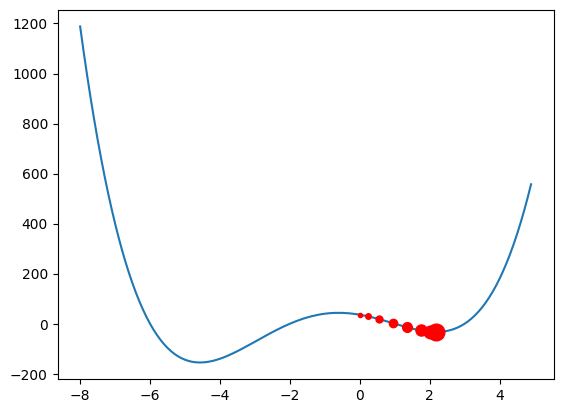

In [2]:
import matplotlib.pyplot as plt

def f(x):
    return (x - 1) * (x + 2) * (x - 3) * (x + 6)
# plotting of the function
x = torch.arange(-8, 5, 0.1)
y = f(x)
plt.plot(x, y)

# try to find a good x value, to make y small
x = torch.tensor(0.0, requires_grad=True)
optimizer = torch.optim.SGD([x], lr=0.01)   # minimizes by default

for epoch in range(10):
    y = f(x)
    plt.plot(x.detach(), y.detach(), "ro", markersize=3+epoch)
    y.backward()
    optimizer.step()
    optimizer.zero_grad()
x

# Train a Model

<Axes: xlabel='petlen', ylabel='petwid'>

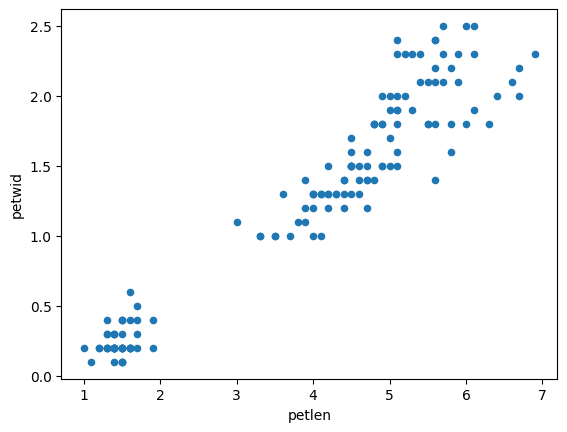

In [11]:
import pandas as pd
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                 names=["seplen", "sepwid", "petlen", "petwid", "variety"])
df.plot.scatter(x="petlen", y="petwid")

In [12]:
ds = torch.utils.data.TensorDataset(
    torch.tensor(df.loc[:, "seplen":"petlen"].values),
    torch.tensor(df.loc[:, ["petwid"]].values)
)

In [8]:
train, test = torch.utils.data.random_split(ds, [0.75, 0.25])

In [19]:
batchX, batchY = train[0:5]
batchX

tensor([[5.2000, 4.1000, 1.5000],
        [5.4000, 3.4000, 1.7000],
        [6.5000, 3.0000, 5.5000],
        [4.6000, 3.6000, 1.0000],
        [6.9000, 3.2000, 5.7000]], dtype=torch.float64)

In [20]:
batchY

tensor([[0.1000],
        [0.2000],
        [1.8000],
        [0.2000],
        [2.3000]], dtype=torch.float64)

In [9]:
dl = torch.utils.data.DataLoader(train, batch_size=5, shuffle=True)

In [21]:
for batchX, batchY in dl:
    print(X)
    print(y)
    break

tensor([[5.1000, 3.5000, 1.4000],
        [4.9000, 3.0000, 1.4000],
        [4.7000, 3.2000, 1.3000],
        [4.6000, 3.1000, 1.5000],
        [5.0000, 3.6000, 1.4000]], dtype=torch.float64)
tensor(-33.0848, grad_fn=<MulBackward0>)


In [22]:
batchX.shape

torch.Size([5, 3])

In [55]:
loss_fn = torch.nn.MSELoss()
coef = torch.zeros((3, 1), dtype=torch.float64, requires_grad=True)
optimizer = torch.optim.SGD([coef], lr=0.001)

for epoch in range(100):
    for batchX, batchY in dl:
        predictions = batchX @ coef
        loss = loss_fn(predictions, batchY)
        loss.backward()   # computes gradient, and adds it to coef.grad
        optimizer.step()
        optimizer.zero_grad()

    X, Y = train[:]
    print(loss_fn(X @ coef, Y))

tensor(0.2746, dtype=torch.float64, grad_fn=<MseLossBackward0>)
tensor(0.2404, dtype=torch.float64, grad_fn=<MseLossBackward0>)
tensor(0.2071, dtype=torch.float64, grad_fn=<MseLossBackward0>)
tensor(0.1805, dtype=torch.float64, grad_fn=<MseLossBackward0>)
tensor(0.1590, dtype=torch.float64, grad_fn=<MseLossBackward0>)
tensor(0.1408, dtype=torch.float64, grad_fn=<MseLossBackward0>)
tensor(0.1261, dtype=torch.float64, grad_fn=<MseLossBackward0>)
tensor(0.1140, dtype=torch.float64, grad_fn=<MseLossBackward0>)
tensor(0.1030, dtype=torch.float64, grad_fn=<MseLossBackward0>)
tensor(0.0949, dtype=torch.float64, grad_fn=<MseLossBackward0>)
tensor(0.0871, dtype=torch.float64, grad_fn=<MseLossBackward0>)
tensor(0.0808, dtype=torch.float64, grad_fn=<MseLossBackward0>)
tensor(0.0751, dtype=torch.float64, grad_fn=<MseLossBackward0>)
tensor(0.0707, dtype=torch.float64, grad_fn=<MseLossBackward0>)
tensor(0.0670, dtype=torch.float64, grad_fn=<MseLossBackward0>)
tensor(0.0643, dtype=torch.float64, grad

In [56]:
X, Y = test[:]
print(loss_fn(X @ coef, Y))

tensor(0.0456, dtype=torch.float64, grad_fn=<MseLossBackward0>)
